# Индивидуальный проект

Для начала в двух словах о датасете.
Для данной работы я воспользовалась общедоступным датасетом, вот отсюда: https://www.kaggle.com/HRAnalyticRepository/absenteeism-dataset.
Этот датасет был разработан около 5 лет назад и отражает фейковые значения. Датасет предназначен для тренировок анализа, чем, собственно, я и займусь.


Структура проекта:
- Постановка проблемы
- Импорт данных, разведочный анализ данных
- Предварительная оценка возможных фич
- Подготовка пайплайна данных, инжиниринг фич
- Подготовка и обучение модели
- Выводы

# Часть 1. Постановка проблемы

Нанимая человека на работу, компании покупают его рабочее время. Предполагается, что все рабочее время, кроме основного оплачиваемого отпуска, сотрудник будет посвящать компании. Но зачастую это не так. 

Сотрудники в рабочее время болеют, отпрашиваются к врачу, встречают родственников с вокзала, справляются с форс-мажорами в виде прорванных труб, лечат животных у ветеринара и так далее. Причин отпроситься на время или на целый рабочий день может быть много. Все это уменьшает то полезное время, которое сотрудник мог бы посвятить делу.

Неэффективное использование рабочего времени сотрудников приводит к снижению производительности и сокращению финансовых показателей компании. Многие компании не считают это время. А зря. 

Данное исследование мы посвятим теме абсентеизма (стремления персонала как можно чаще отсутствовать на рабочем месте). Изучим датасет, выделим корреляции - что влияет на количество часов отсутствия сотрудника на рабочем месте, а также построим модель предсказания этих часов абсентеизма.

*Важно: датасет является сам по себе крошечным, можно сказать, игрушечным. Автор датасета предлагает изучить именно взаимосвязь количества часов отсутствия с возрастом сотрудников и их стажем.*

# Часть 2. Импорт данных. Разведочное исследование

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.

In [3]:
# Импортируем библиотеку для работы с данными Pandas
import pandas as pd

In [4]:
# Загрузим CSV-файл с данными (CSV-файл лежит рядом с исполняемым блокнотом)
df_hr = pd.read_csv('Absenteeism Dataset.csv')

In [5]:
# Частично отрисуем этот датасет на экран
df_hr

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


Наш датасет представляет из себя набор данных о 8335 сотрудниках. Он содержит информацию такую, как:
- Имя и фамилия сотрудника
- Гендер
- Город 
- Должность
- Название департамента
- Возраст
- Стаж в этой компании
- Количество часов, проведенных вне рабочего места

In [9]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB



Мы проверили датасет на наличие пустых значений. 

Пустых значений не обнаружено! :)


In [12]:
df_hr.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


Благодаря таблице мы можем чуть лучше понять наш датасет.
Так, становится очевидным, что средний возраст сотрудников - 42 года, максимальный - 77 лет. 
В среднем стаж составляет около 5 лет.
Всего сотрудниками пропущенно 8336 рабочих часов - руководству стоит, конечно, об этом задуматься!

array([[<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'LengthService'}>,
        <AxesSubplot:title={'center':'AbsentHours'}>]], dtype=object)

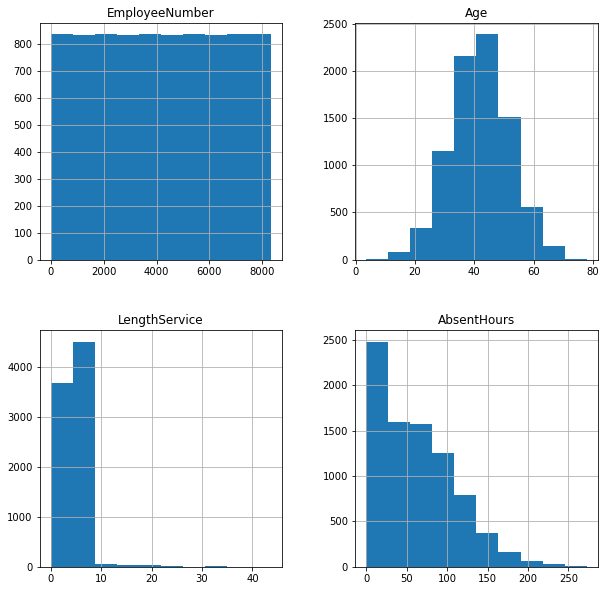

In [25]:
df_hr.hist(figsize=(10,10))
plt.show()

Благодаря диаграммам выше видим, что:
- Распределение по возрасту является скорее нормальным
- Распределение по стажу не является нормальным и содержит явные выбросы
- Распределение по кол-ву часов вне рабочего места является скорее экспоненциальным

Посмотрим каждую из переменных набора данных поближе.

In [42]:
# Проверим, сколько у нас мужчин и женщин в выборке
df_hr['Gender'].value_counts()

M    4216
F    4120
Name: Gender, dtype: int64

In [36]:
# Проверим, сколько у нас уникальных значений в столбце должности
df_hr['JobTitle'].nunique()

47

In [34]:
# Теперь глянем, что это за должности?
df_hr['JobTitle'].unique()

array(['Baker', 'Accounting Clerk', 'Accounts Payable Clerk',
       'Accounts Receiveable Clerk', 'Auditor', 'Bakery Manager',
       'Benefits Admin', 'Cashier', 'Compensation Analyst',
       'HRIS Analyst', 'Investment Analyst', 'Labor Relations Analyst',
       'Recruiter', 'Dairy Person', 'Systems Analyst', 'Trainer',
       'Meat Cutter', 'CEO', 'VP Stores', 'Legal Counsel',
       'VP Human Resources', 'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Human Resources', 'Exec Assistant, Legal Counsel',
       'CHief Information Officer', 'Store Manager', 'Meats Manager',
       'Exec Assistant, Finance', 'Director, Recruitment',
       'Director, Training', 'Director, Labor Relations',
       'Director, HR Technology', 'Director, Employee Records',
       'Director, Compensation', 'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Director, Accounts Payable',
       'Director, Audit', 'Director, Accounting', 'Director, Investments',


In [37]:
# Проверим, сколько у нас уникальных значений в столбце города
df_hr['City'].nunique()

243

In [38]:
# Теперь глянем, что это за города?
df_hr['City'].unique()

array(['Burnaby', 'Courtenay', 'Richmond', 'Victoria', 'New Westminster',
       'Vancouver', 'Sechelt', 'Kamloops', 'North Vancouver', 'Vananda',
       'West Vancouver', 'Nanaimo', 'Aldergrove', 'Kelowna', 'Trail',
       'Penticton', 'Duncan', 'Crawford Bay', 'Port Hardy', 'Logan Lake',
       'Abbotsford', 'Dawson Creek', 'Surrey', 'Squamish',
       'Good Hope Lake', 'Sidney', 'Coquitlam', 'Chilliwack',
       'Okanagan Mission', 'Ganges', 'Prince George', 'Atlin', 'Whistler',
       'Spences Bridge', 'New Westminister', 'Gibsons', 'Vernon',
       'Fauquier', 'Mackenzie', 'Gold Bridge', 'Fort Fraser', 'Nelson',
       'Kaslo', 'Creston', 'Wynndel', 'Muncho Lake', 'Kitimat',
       'Lac La Hache', 'Armstrong', 'Quesnel', 'Hixon', 'Ocean Falls',
       'Vallican', 'North Pender Island', 'Montney', 'Burns Lake',
       'Midway', 'Westwold', 'Terrace', 'Golden', 'Port Coquitlam',
       'White Rock', 'Summerland', 'Langley', 'Huntingdon', 'Yale',
       'Aiyansh', 'Haney', 'Bowen Isl

# Часть 3. Предварительная оценка возможных фич

В следующей части проекта мы сформулируем гипотезы.

Гипотеза 1. Существует положительная связь между возрастом сотрудника и количеством часов, проведенных вне рабочего места.

Гипотеза 2. Существует связь между стажем сотрудника и количеством часов, проведенных вне рабочего места.

Проверим выдвинутые две выше гипотезы.

In [28]:
# Pandas имеет один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,EmployeeNumber,Age,LengthService,AbsentHours
EmployeeNumber,1.000000,-0.018445,-0.119631,0.007418
Age,-0.018445,1.000000,0.053104,0.830234
LengthService,-0.119631,0.053104,1.000000,-0.044202
AbsentHours,0.007418,0.830234,-0.044202,1.000000


Таким образом, мы видим, из таблицы выше, есть ли между переменными связь.

Гипотеза 1: подтверждена. Коэффициент корреляции между значениям Age & AbsentHours равен 0,83, что говорит о сильной положительной связи. То есть, чем старше сотрудник, тем больше часов от отсутствует на рабочем месте.
Это может быть объяснено рядом факторов: к примеру, с возрастом у людей появляется больше обязательств - дети, которые болеют или которых надо срочно забрать из детского сада. Также с возрастом у людей появляется больше проблем со здоровьем - они чаще ходят в больницу, берут больничные, проходят обследования.

Гипотеза 2: не подтверждена. Коэффициент корреляции между значениям LenghService & AbsentHours равен -0,04, что говорит о незначительной отрицательной связи. 

# Часть 4. Подготовка пайплайна данных, инжиниринг фич

In [73]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot

In [74]:
pd.options.display.max_columns = 999

In [75]:
df_hr.tail()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores
8335,8336,Salter,Charles,M,Vancouver,Dairy Person,Dairy,Vancouver,Stores,46.192782,5.174722,112.023389,Stores


Разобьем нашу выборку на пространство признаков (X) и ответов (y)

In [79]:
X = df_hr[['AbsentHours']]
y = df_hr[['Age']]

In [80]:
# В объекте X у нас оказываются признаки

X

,AbsentHours
0,36.577306
1,30.165072
2,83.807798
3,70.020165
4,0.000000
...,...
8331,93.665111
8332,0.000000
8333,176.356940
8334,60.321917


In [81]:
# в объекте 'y' у нас оказываются ответы для этих признаков

y

,Age
0,32.028816
1,40.320902
2,48.822047
3,44.599357
4,35.697876
...,...
8331,46.057544
8332,34.455490
8333,58.347160
8334,43.340616


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


# Посмотрим каков у нас оказался размер объектов в трейне и тесте
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6668, 1)
(1668, 1)
(6668, 1)
(1668, 1)


In [84]:
Y_test

,Age
3470,59.790107
2301,27.064876
7979,25.199267
932,32.634324
7466,50.664280
...,...
4614,39.610151
8220,41.712761
1097,40.213103
548,46.402244


# Часть 5. Подготовка и обучение модели

In [85]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [86]:
# посмотрим, какие из наших признаков оказались наиболее значимыми для определения зарплаты на объектах
importance = regressor.coef_

print(importance)

[[0.16828373]]


In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
# Определим функцию оценки ошибки получившейся модели:

def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

Попробуем теперь эту модель в деле.

По канону оценку следует на двух выборках: на той, на которой модель тренировалась (X_train, Y_train) и на той, которую модель не видела совсем (X_test, Y_test)

In [91]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 5.520287749868934
R2 score is 0.696503416143718
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 5.620751194005099
R2 score is 0.6573982947090804


In [92]:
X_test

,AbsentHours
3470,182.480514
2301,0.000000
7979,0.000000
932,25.175315
7466,66.640780
...,...
4614,46.044958
8220,51.779124
1097,5.957262
548,109.553438


In [101]:
"""
Допустим, к нам на работу выходит человек в возрасте 33 года: 

Age = 33

Каково ожидаемое количество часов, проведенных вне рабочего места?

Выясним это, используя метод .predict() только что обученной модели lin_model. 
Передадим в него параметры сотрудника. 

"""

lin_model.predict([[33]])

array([[37.20293983]])

То есть у человеку в возрасте 33 года соответствуют примено 37 часов абсентеизма.

А потом я еще погуглила, как нарисовать эту линейную регрессию. Получилось что-то типа того:

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [59]:
dataset = pd.read_csv('Absenteeism Dataset.csv')
X = dataset[["AbsentHours"]]
y = dataset[["Age"]]

In [60]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [61]:
y_pred = regressor.predict(X)

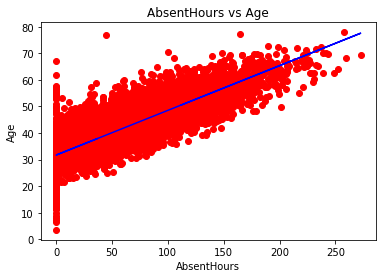

In [100]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('AbsentHours vs Age')
plt.xlabel('AbsentHours')
plt.ylabel('Age')
plt.show()

# Часть 6. Выводы

Таким образом, у нас получилось небольшое исследование, основанное буквально на нескольких переменных.

Нам удалось:
- описать датасет (посмотреть, какая информация скрывается за этими строками)
- сформулировать и проверить гипотезы о связи между переменными (так, было выяснено, что возраст сотрудника влияет на кол-во часов, проведенных сотрудников вне рабочего места)
- создать модель предсказания кол-ва часов абсентеизма в зависимости от возраста сотрудника на основе линейной регрессии

Среди ограничений и будущих направлений исследования можно назвать:
1. изучение корреляции между кол-вом часов абсентеизма и другими текстовыми переменными путем их кодирования
2. далее станет возможным построить линейную регрессионную модель с тектовыми переменными

# The End
Made by Lisa Alexeeva